100%|██████████| 17/17 [00:22<00:00,  1.34s/it]


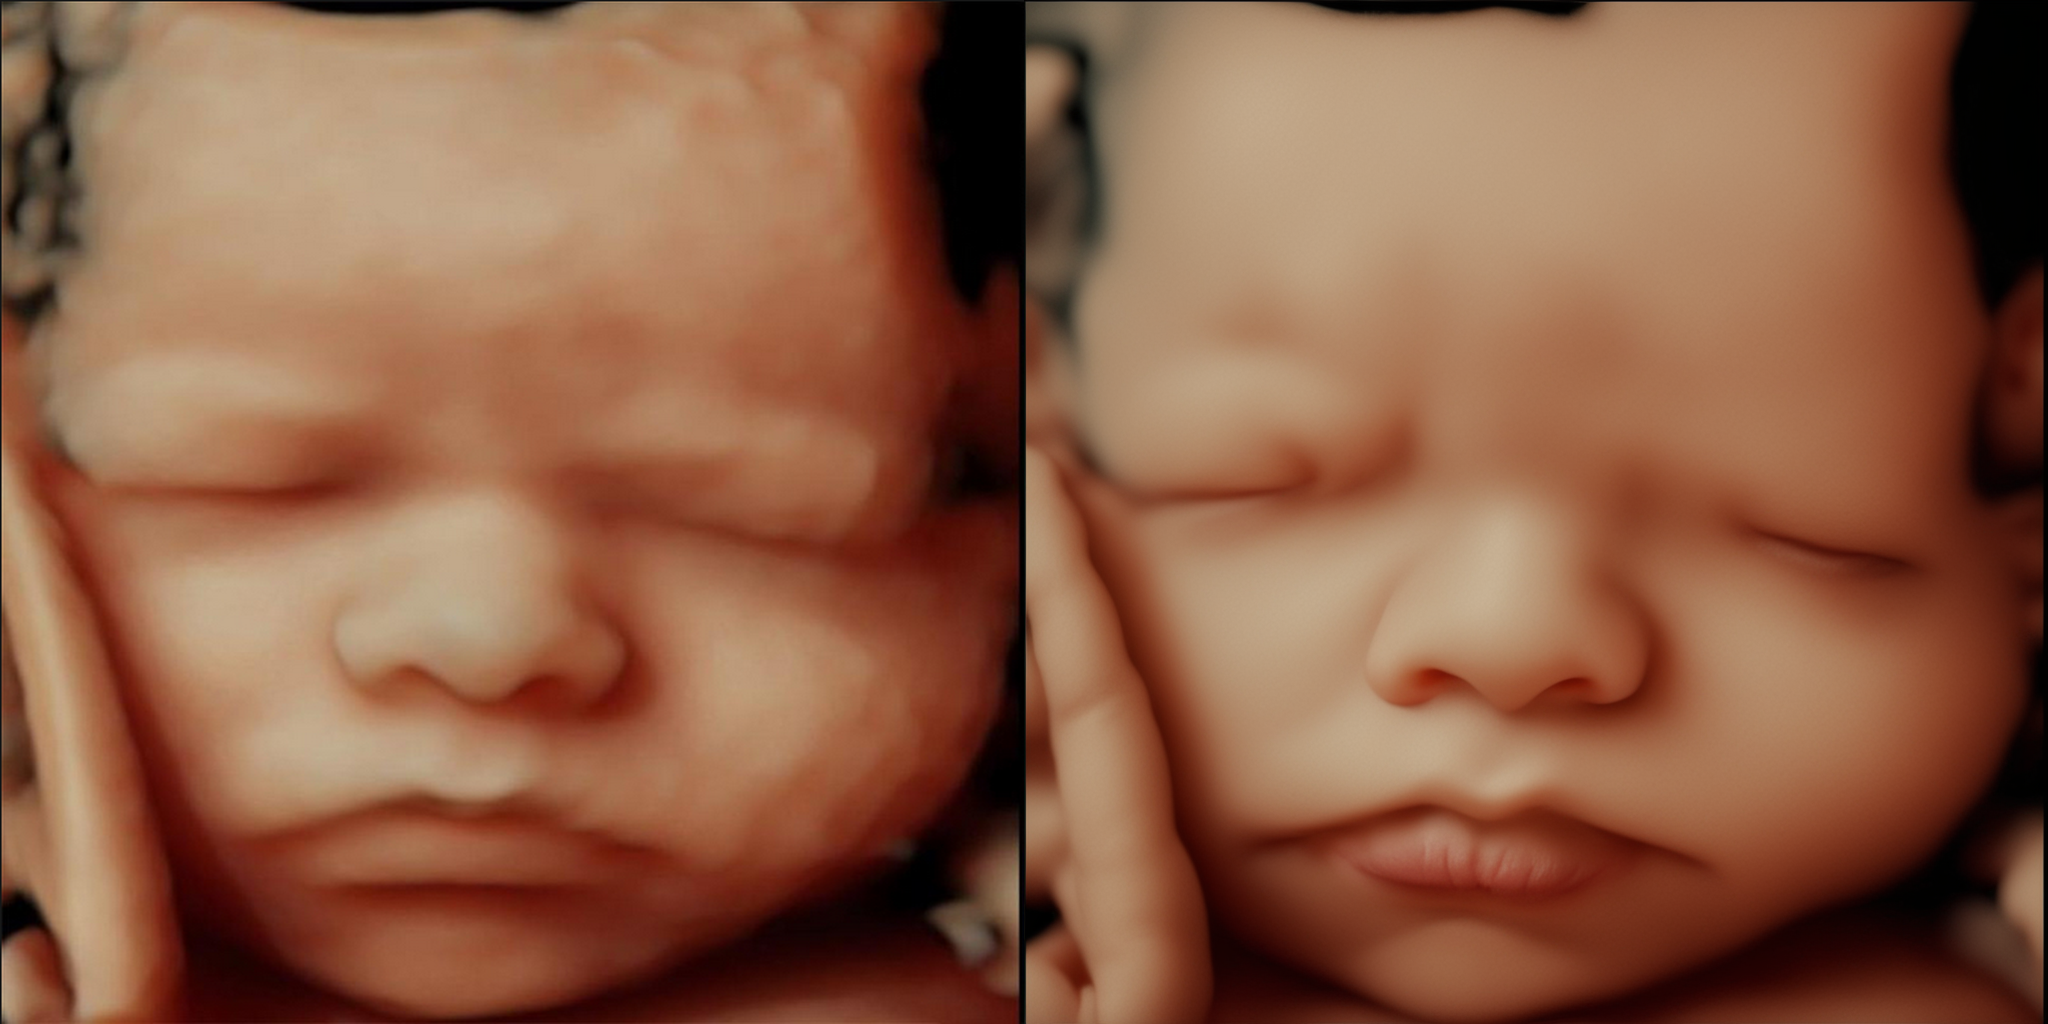

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image,ControlNetModel, StableDiffusionControlNetPipeline
from diffusers.utils import make_image_grid, load_image
from PIL import Image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-depth")

# Load base model
pipe = StableDiffusionControlNetPipeline.from_pretrained(
   "stabilityai/stable-diffusion-xl-refiner-1.0",
   torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
    controlnet=controlnet
)

100%|██████████| 17/17 [00:15<00:00,  1.10it/s]


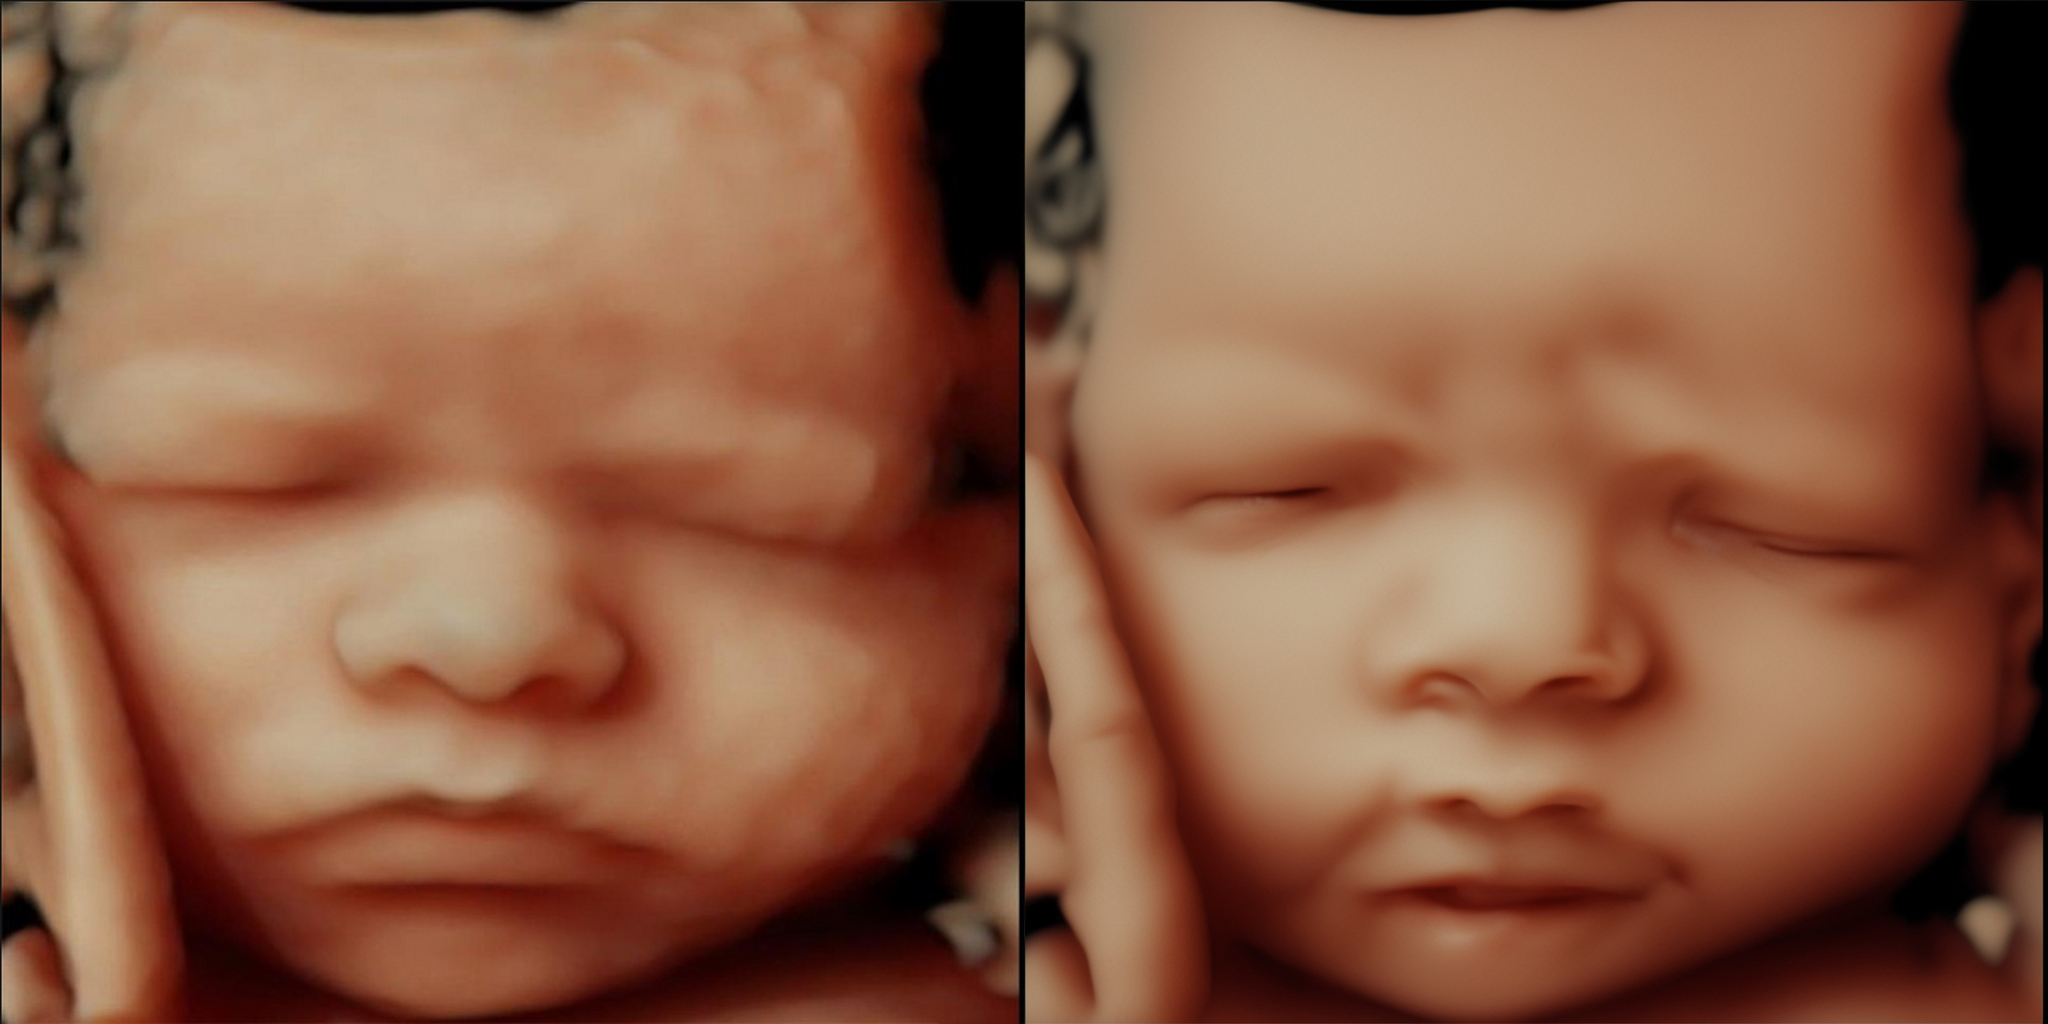

In [8]:
# prepare image
url = "/home/yahir-luna/Documents/3dUltra/imgs/test2.png"
init_image = load_image(url)
init_image =  init_image.resize((1024, 1024), Image.LANCZOS)

prompt = \
("A beautiful newborn baby, soft facial features, "
"closed eyes, small lips, peaceful expression. "
"Realistic photograph with warm lighting, realistic soft beige skin, natural baby proportions. "
"Studio lighting, shallow depth of field.")

prompt = '"a realistic baby face, soft skin, smiling"'
# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image, strength=0.35).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

In [ ]:
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-depth")

# Load base model
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet
)